## 01. Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [5]:
path = r'/Users/malikpressley/Desktop/Achievement 6/Boat Sales Analysis'

In [6]:
df = pd.read_csv(r'/Users/malikpressley/Desktop/Achievement 6/Boat Sales Analysis/02 Data/Prepared Data/df_world.csv', index_col = False)

In [7]:
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'df_world.csv'), index_col = False)

## 02. Data Cleaning

In [8]:
df.columns

Index(['Unnamed: 0', 'Location', 'Price', 'Boat Type', 'Manufacturer', 'Type',
       'Year Built', 'Length', 'Width', 'Material',
       'Number of views last 7 days'],
      dtype='object')

In [9]:
df.head(20)

,Unnamed: 0,Location,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Number of views last 7 days
0,0,Switzerland,CHF 3337,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,GRP,226
1,1,Germany,EUR 3490,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,75
2,2,Switzerland,CHF 3770,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,124
3,3,Denmark,DKK 25900,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,GRP,64
4,4,Germany,EUR 3399,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,58
5,5,Switzerland,CHF 3650,Sport Boat,Linder power boats,new boat from stock,0,4.03,1.56,Aluminium,132
6,6,Switzerland,CHF 3600,Catamaran,BÃÂ©nÃÂ©teau power boats,"Used boat,Unleaded",1999,6.20,2.38,Aluminium,474
7,7,Denmark,DKK 24800,Sport Boat,BÃÂ©nÃÂ©teau power boats,Used boat,0,3.00,2.50,GRP,134
8,8,Germany,EUR 3333,Fishing Boat,Crescent power boats,new boat from stock,2019,3.64,1.37,GRP,45
9,9,Italy,EUR 3300,Pontoon Boat,Whaly power boats,new boat from stock,2018,4.35,1.73,GRP,180


In [10]:
df.shape

(9847, 11)

In [11]:
# Check for missing values

df.isnull().sum()

# No missing values to handle

Unnamed: 0                     0
Location                       0
Price                          0
Boat Type                      0
Manufacturer                   0
Type                           0
Year Built                     0
Length                         0
Width                          0
Material                       0
Number of views last 7 days    0
dtype: int64

In [12]:
dups = df.duplicated()

In [13]:
dups.shape # No dups

(9847,)

## Extreme Values Check

/Users/malikpressley/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Length', ylabel='Density'>

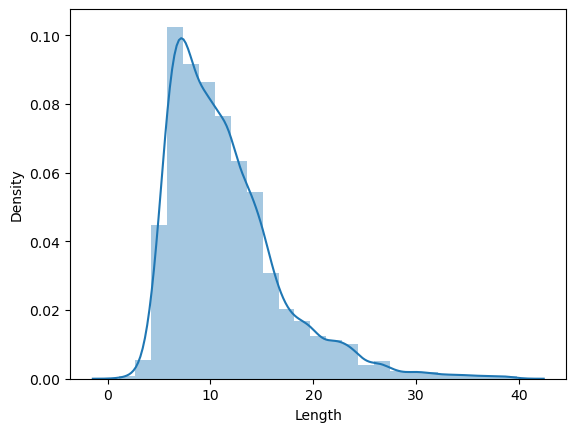

In [14]:
sns.distplot(df['Length'], bins=25) # Shows extreme values

# Some of the outliers in the high values may need to be removed, but let's try without doing so first.

In [15]:
df['Length'].mean() # Check the mean

11.423465014725315

In [16]:
df['Length'].median() # Check the median

10.25

In [17]:
df['Length'].max() # Check the max

39.8

## Data Prep for Regeression Analysis

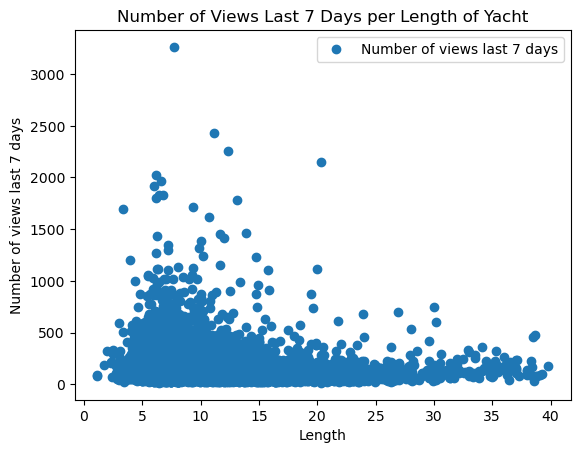

In [36]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_plot= df.plot(x = 'Length', y='Number of views last 7 days',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Number of Views Last 7 Days per Length of Yacht')  
plt.xlabel('Length')  
plt.ylabel('Number of views last 7 days')  
plt.show()

In [37]:
# save scatterpolot map as image
df_plot.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatter_length_views.png'))

### Hypothesis: If the Yacht length is smaller, then customers are more drawn to buying it.

In [19]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['Length'].values.reshape(-1,1)
y = df['Number of views last 7 days'].values.reshape(-1,1)

In [20]:
X

array([[4.  ],
       [4.  ],
       [3.69],
       ...,
       [4.4 ],
       [4.37],
       [3.6 ]])

In [21]:
y

array([[226],
       [ 75],
       [124],
       ...,
       [354],
       [266],
       [194]])

In [22]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## Regression Analysis

In [23]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [24]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [25]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

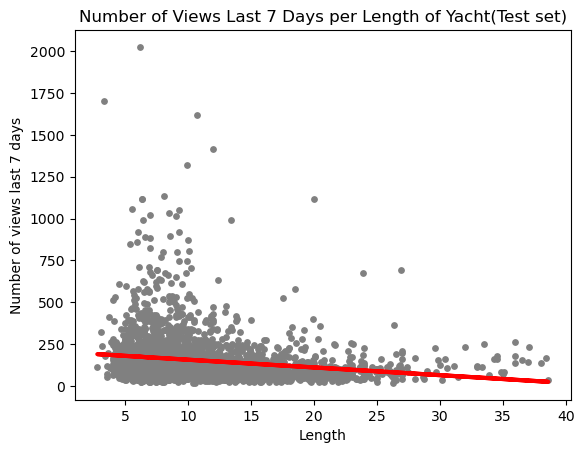

In [26]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Number of Views Last 7 Days per Length of Yacht(Test set)')
plot_test.xlabel('Length')
plot_test.ylabel('Number of views last 7 days')
plot_test.show()

### The line seems to follow the overal trend of the dots. Even if some of the dots are higher or lower...it still follows

In [27]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [28]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-4.61454619]]
Mean squared error:  19554.19280939037
R2 score:  0.0327406758589851


In [29]:
y_predicted

array([[174.19768765],
       [110.51695022],
       [130.35949884],
       ...,
       [138.66568198],
       [161.27695831],
       [171.84426909]])

In [30]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,154,174.197688
1,52,110.516950
2,49,130.359499
3,134,138.204227
4,146,160.953940
5,48,146.048956
6,109,154.170557
7,138,183.426780
8,122,158.462085
9,46,149.879029


## Compare the predicted y values with the actual y values in a dataframe.

In [31]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [32]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [33]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-4.61454619]]
Mean squared error:  23476.501703387687
R2 score:  0.026107046175437798


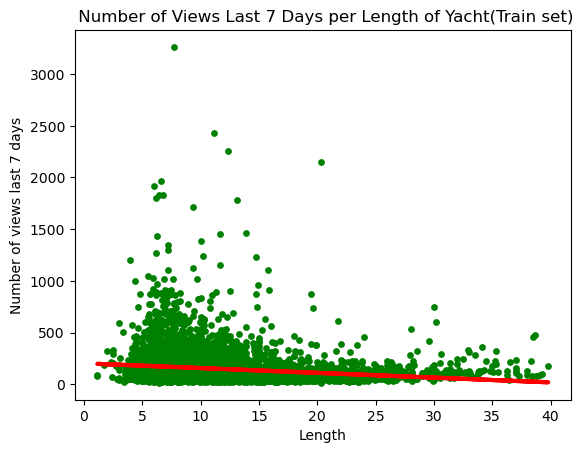

In [34]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title(' Number of Views Last 7 Days per Length of Yacht(Train set)')
plot_test.xlabel('Length')
plot_test.ylabel('Number of views last 7 days')
plot_test.show()

In [35]:
#Include your thoughts on how well the model performed on the test set in a markdown cell

### Although the red line follows the trend - it is not so accurate. This indicates a negative relationship. The models prediction are not close to the actual values. As far as bias, I am not sure if there is any here. There would need to be a closer look at how the data was collected - but, for this case it was gathered by a user from Kaggle.